In [1]:
import pandas as pd
from pandas import Series
measurement = pd.read_csv('ARMA_example_Q1.csv', names = ["time", "measurement"], header = 0)
measurement

,time,measurement
0,1,315
1,2,195
2,3,310
3,4,316
4,5,325
5,6,335
6,7,318
7,8,355
8,9,420
9,10,410


,time,measurement
0,1,315
1,2,195
2,3,310
3,4,316
4,5,325
5,6,335
6,7,318
7,8,355
8,9,420
9,10,410


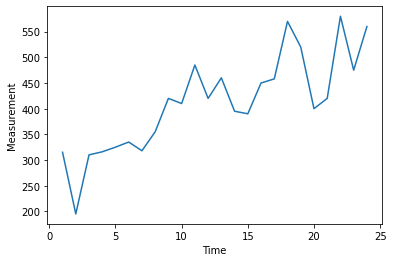

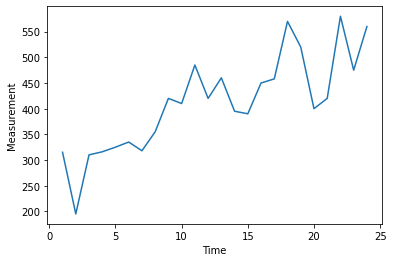

In [2]:
from matplotlib import pyplot as plt
x = measurement.time
y = measurement.measurement
plt.plot (x, y)
plt.xlabel ('Time')
plt.ylabel ('Measurement')
plt.show()

In [3]:
from statsmodels.tsa.arima_model import ARIMA 
#from statsmodels.tsa.arima.model import ARIMA 



E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be 

In [4]:
measurement_model = ARIMA(measurement.measurement, order=(0,1,1))
#measurement_model = ARIMA(measurement.measurement, order=(0,1,1),trend="t")

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [5]:
measurement_model_fit = measurement_model.fit()

In [6]:
measurement_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.measurement   No. Observations:                   23
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -125.275
Method:                       css-mle   S.D. of innovations             52.390
Date:                Fri, 14 Oct 2022   AIC                            256.550
Time:                        08:21:26   BIC                            259.956
Sample:                             1   HQIC                           257.407
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0965      1.545      7.183      0.000       8.069      14.124
ma.L1.D.measurement    -1.0000      0.139     -7.187      0.000      -1.273      -0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.measurement   No. Observations:                   23
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -125.275
Method:                       css-mle   S.D. of innovations             52.390
Date:                Fri, 14 Oct 2022   AIC                            256.550
Time:                        08:21:26   BIC                            259.956
Sample:                             1   HQIC                           257.407
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0965      1.545      7.183      0.000       8.069      14.124
ma.L1.D.measurement    -1.0000      0.139     -7.187      0.000      -1.273      -0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'Plot of IMA (1,1) model')

Text(0.5, 1.0, 'Plot of IMA (1,1) model')

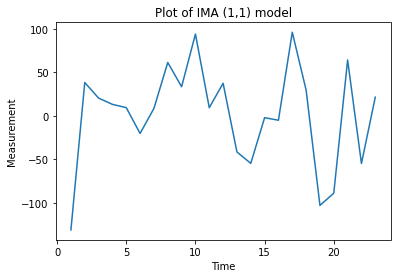

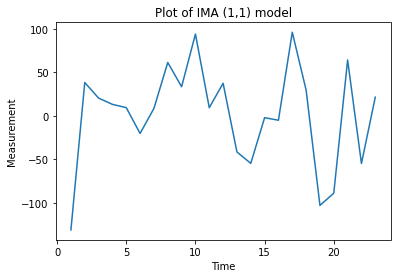

In [7]:
from pandas import DataFrame as df
model_res = df(measurement_model_fit.resid)
plt.plot (model_res)
plt.xlabel ('Time')
plt.ylabel ('Measurement')
plt.title ('Plot of IMA (1,1) model')

In [8]:
measurement_predict = measurement_model_fit.predict (1, len(y), typ = 'levels').rename("Predictions")

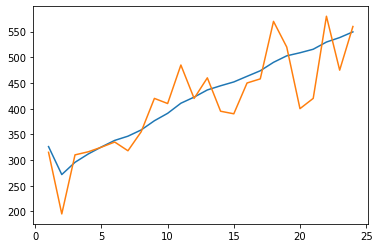

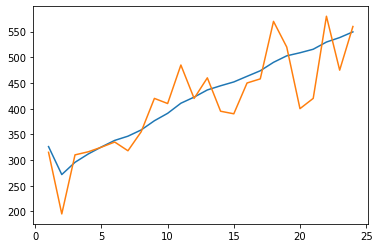

In [9]:
plt.plot (measurement_predict)
plt.plot (x, y)

In [10]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error (y, measurement_predict)
mse1

2352.7523283225883

2352.7523283225883

In [11]:
measurement_diff = measurement.diff()

In [12]:
measurement_diff

,time,measurement
0,NaN,NaN
1,1.0,-120.0
2,1.0,115.0
3,1.0,6.0
4,1.0,9.0
5,1.0,10.0
6,1.0,-17.0
7,1.0,37.0
8,1.0,65.0
9,1.0,-10.0


,time,measurement
0,NaN,NaN
1,1.0,-120.0
2,1.0,115.0
3,1.0,6.0
4,1.0,9.0
5,1.0,10.0
6,1.0,-17.0
7,1.0,37.0
8,1.0,65.0
9,1.0,-10.0


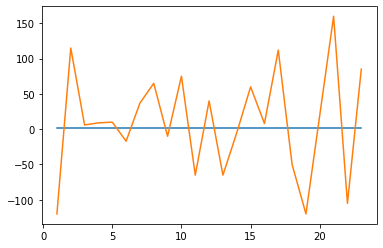

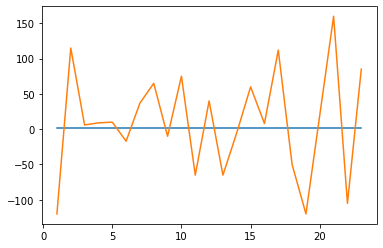

In [13]:
plt.plot (measurement_diff)
plt.show()

In [14]:
measurement_diff = measurement_diff.iloc[1:]

In [15]:
measurement_model2 = ARIMA(measurement_diff.measurement, order=(0,0,1))

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [16]:
measurement_model_fit2 = measurement_model2.fit()

In [17]:
measurement_model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            measurement   No. Observations:                   23
Model:                     ARMA(0, 1)   Log Likelihood                -125.275
Method:                       css-mle   S.D. of innovations             52.390
Date:                Fri, 14 Oct 2022   AIC                            256.550
Time:                        08:21:26   BIC                            259.956
Sample:                             0   HQIC                           257.407
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0965      1.545      7.183      0.000       8.069      14.124
ma.L1.measurement    -1.0000      0.139     -7.187      0.000      -1.273      -0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            measurement   No. Observations:                   23
Model:                     ARMA(0, 1)   Log Likelihood                -125.275
Method:                       css-mle   S.D. of innovations             52.390
Date:                Fri, 14 Oct 2022   AIC                            256.550
Time:                        08:21:26   BIC                            259.956
Sample:                             0   HQIC                           257.407
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0965      1.545      7.183      0.000       8.069      14.124
ma.L1.measurement    -1.0000      0.139     -7.187      0.000      -1.273      -0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""